# Bike Sharing Assignment

Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 




This solution is divided into 

1. Data Understanding and Exploration
2. Data Cleaning
3. Data preparation
4. Model building and evaluation

## Step 1 : Reading and Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

df = pd.read_csv('day.csv')

In [3]:
# Checking the head of the dataset 

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Inspect various aspects of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.shape

(730, 16)

## Step 2 : Data Cleaning Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Checking for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### There are no null values in the dataset

## Understand the dataset

### Correlation check

<AxesSubplot:>

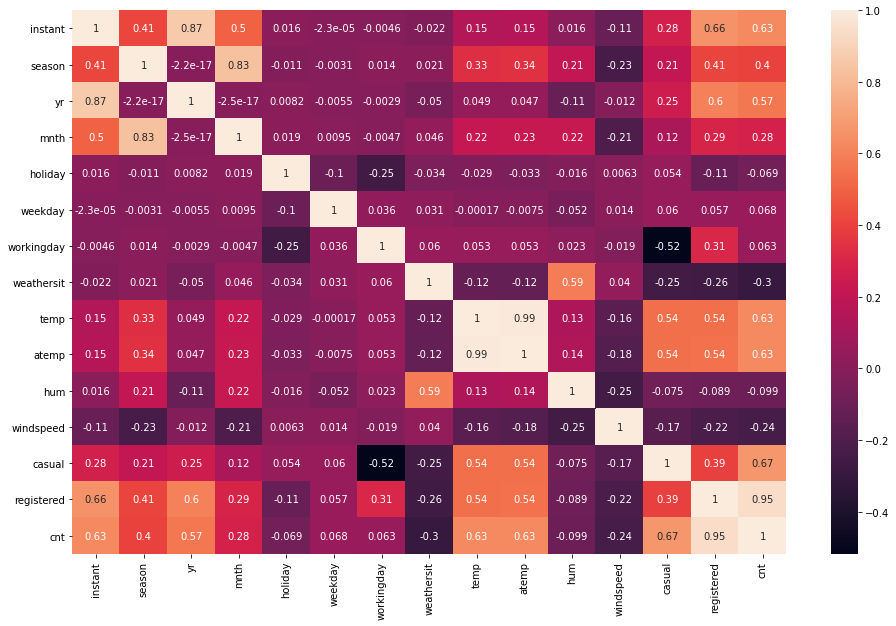

In [9]:
# Lets see the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)

#### Observation

The heat maps clearly shows that all the variables are multicollinear in nature and also shows which variables has highest correlation with target variable.

## Data Visualization of numeric variables

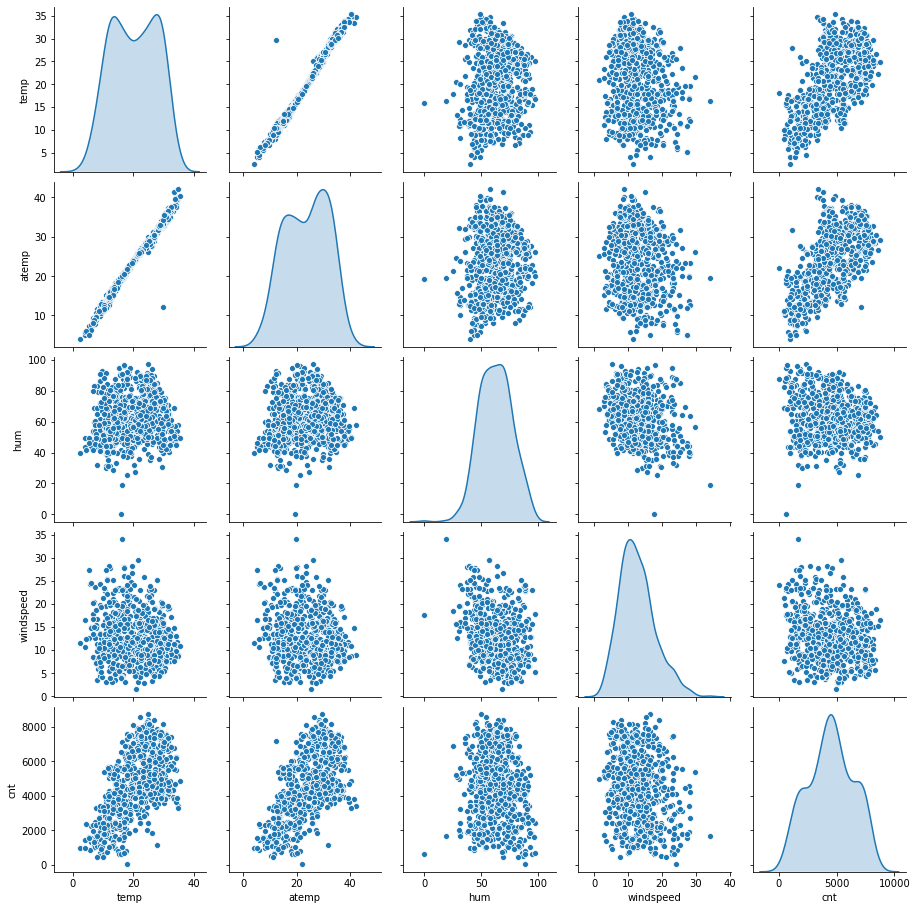

In [10]:
#Let's check thisusing pairplot

df_numeric=df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_numeric, diag_kind='kde')
plt.show()

##### From the above visualization we can clearly notice that there is a linear relationship between 'temp', 'atemp' and 'cnt'. Both the variables 'temp' and 'atemp' are closely related. So we can consider only one variable between them.

### Data Preparation 

In [11]:
# Here the target variable is cnt. 
# Deleting the unwanted columns


df = df.drop(['instant','dteday','casual','registered','atemp'], axis=1)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [13]:
# Let's check season 

df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
# Mapping season

df.season = df.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [15]:
# Mapping weekday

print(df.weekday.value_counts())
df.weekday = df.weekday.map({0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})
print(df.weekday.value_counts())

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
Wed    105
Tue    105
Mon    105
Sat    104
Sun    104
Thu    104
Fri    103
Name: weekday, dtype: int64


In [16]:
# Mapping weathersit

print(df.weathersit.value_counts())
df.weathersit = df.weathersit.map({1:'Clear+Few clouds',2:'Mist+Cloudy',3:'Light Snow+Light Rain+Thunderstorm',4:'Heavy Rain+Ice Pallets+Thunderstorm'})
print(df.weathersit.value_counts())

1    463
2    246
3     21
Name: weathersit, dtype: int64
Clear+Few clouds                      463
Mist+Cloudy                           246
Light Snow+Light Rain+Thunderstorm     21
Name: weathersit, dtype: int64


In [17]:
# Mapping mnth

print(df.mnth.value_counts())
df.mnth = df.mnth.map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
print(df.mnth.value_counts())

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
Mar     62
Oct     62
Jan     62
Jul     62
Aug     62
May     62
Dec     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64


In [18]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear+Few clouds,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear+Few clouds,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear+Few clouds,9.305237,43.6957,12.522300,1600


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Data Visualization of categorical variables

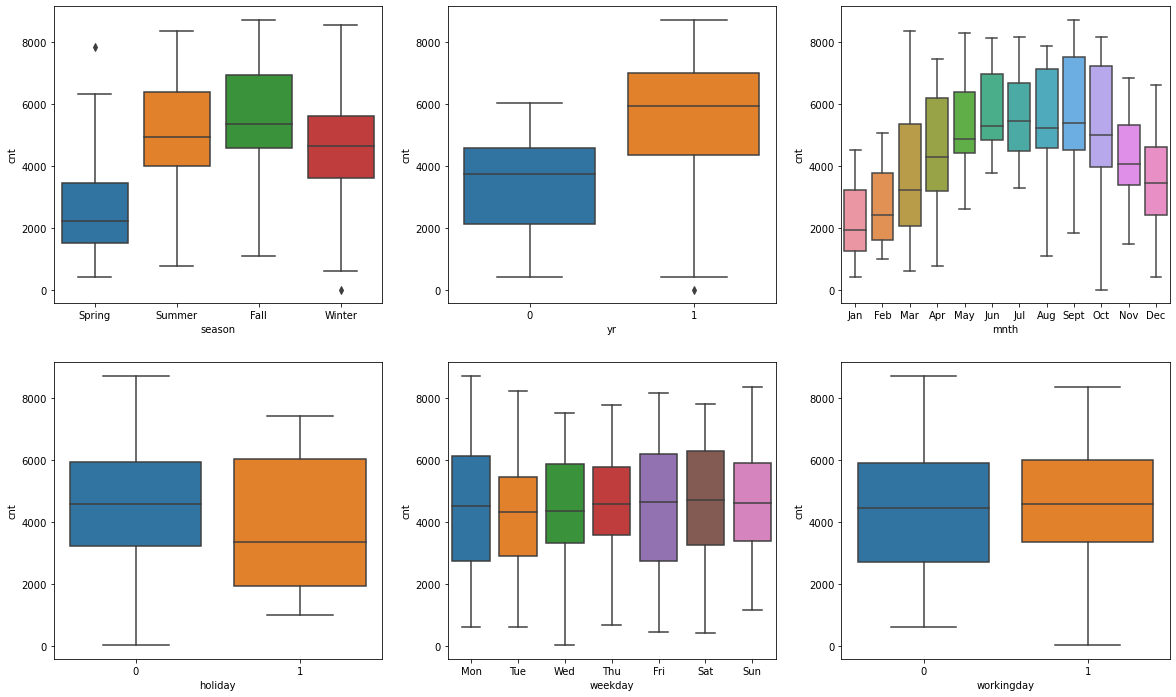

In [20]:
# Data visualization for categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

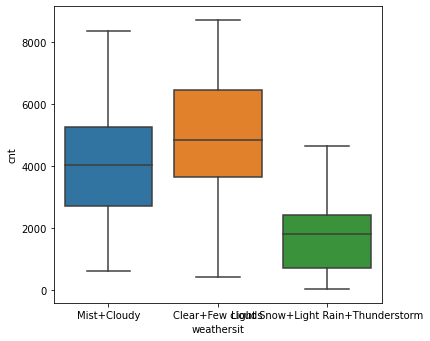

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

#### From the above subplots followinf are the observations


1. Bike sharing count during spring is less & in Summer, Fall and Winter the median count is more than 4000+ bookings. So season can be a very good predictor.
2. Bike sharing count has increased from 2018 to 2019.
3. Most of the bookings has happened in May, Jun, Jul, Aug and Sept and month could be a good predictor.
4. Bike sharing count is less during holidays
5. The count has zero values for Heavy Rain+Ice Pallets+Thunderstorm and count is less during Light Snow+Light Rain+Thunderstorm


## Dummy Varaibles 

In [22]:
# Dummy Variables for categorical columns - season,mnth,weekday and weathersit

dummy_vars = df[['season','mnth','weekday','weathersit']]


In [23]:
dummy_vars.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Mon,Mist+Cloudy
1,Spring,Jan,Tue,Mist+Cloudy
2,Spring,Jan,Wed,Clear+Few clouds
3,Spring,Jan,Thu,Clear+Few clouds
4,Spring,Jan,Fri,Clear+Few clouds


In [24]:
dummy_vars = pd.get_dummies(dummy_vars, drop_first=True)

In [25]:
dummy_vars.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow+Light Rain+Thunderstorm,weathersit_Mist+Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# concat the dummy_vars with the original one 

df = pd.concat([df, dummy_vars], axis=1)

In [27]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow+Light Rain+Thunderstorm,weathersit_Mist+Cloudy
0,Spring,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,Clear+Few clouds,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thu,1,Clear+Few clouds,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear+Few clouds,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Drop the columns for which we have created dummies 

df = df.drop(['season','mnth','weekday','weathersit'],axis=1)

In [29]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow+Light Rain+Thunderstorm,weathersit_Mist+Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.shape

(730, 29)

In [31]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow+Light Rain+Thunderstorm,weathersit_Mist+Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.143836,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.351164,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the data into training and testing sets

In [32]:
import sklearn 
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling features 
### We will use Min_Max scaling to normalize the data

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             510 non-null    int64  
 1   holiday                                        510 non-null    int64  
 2   workingday                                     510 non-null    int64  
 3   temp                                           510 non-null    float64
 4   hum                                            510 non-null    float64
 5   windspeed                                      510 non-null    float64
 6   cnt                                            510 non-null    int64  
 7   season_Spring                                  510 non-null    uint8  
 8   season_Summer                                  510 non-null    uint8  
 9   season_Winter                                  510 no

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the columns except the '0/1' and 'dummy' variables

scaler_vars = ['temp','hum','windspeed','cnt']

df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow+Light Rain+Thunderstorm,weathersit_Mist+Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [37]:
# Dividing the train data to X and Y sets for model building

y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## RFE - Recursive Feature Elimination

In [39]:
# Importing RFE and Linear Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 12),
 ('weekday_Sun', False, 11),
 ('weekday_Thu', False, 9),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 8),
 ('weathersit_Light Snow+Light Rain+Thunderstorm', True, 1),
 ('weathersit_Mist+Cloudy', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

## Model 1

In [44]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()


In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.31e-191
Time:                        13:33:06   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

VIF to check for multicolleniarity

In [49]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [50]:
# Dropping the constant

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_Winter,3.48
7,season_Summer,2.84
14,weathersit_Mist+Cloudy,2.29
0,yr,2.09
12,weekday_Mon,1.98


###### By looking into the above model we have 0.048 P-value for 'mnth_Jan' and high VIF for hum and temp.



###### Let's consider the highest p-value and drop it. 

## Model 2

In [52]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [53]:
# Creating X_train dataframe with RFE selected variables

X_train_model2 = X_train_rfe[col]

In [54]:
X_train_model2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [55]:
# 'mnth_Jan' has the highest P-value.

# Dropping variable 'mnth_Jan'

X_train_model2 = X_train_rfe.drop(['mnth_Jan'], axis=1)

In [56]:
X_train_model2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [57]:
# Rebuilding the model without 'mnth_Jan' variable

# Adding a constant variable 

import statsmodels.api as sm  
X_train_model2 = sm.add_constant(X_train_model2)


In [58]:
X_train_model2.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [59]:

# Running linear model

lm = sm.OLS(y_train,X_train_model2).fit()

#Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.13e-191
Time:                        13:33:06   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### VIF for model 2 to check multicolleniarity

In [60]:
# dropping the constant

X_train_model2 = X_train_model2.drop(['const'], axis=1)

In [61]:
X_train_model2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,season_Spring,4.24
8,season_Winter,3.44
7,season_Summer,2.83
13,weathersit_Mist+Cloudy,2.28
0,yr,2.08
11,weekday_Mon,1.97


###### Fron the Model 2 summary, P-value for all the independent variables looks fine. But VIF is showing multicollinearity 
###### Lets drop the 'hum' which is showing the highest VIF from the above model

## Model 3

In [63]:
X_train_model2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [64]:
# Creating X_train dataframe with model2 selected variables

#Dropping 'hum' variable from the model

X_train_model3 = X_train_model2.drop(['hum'], axis=1)

In [65]:
X_train_model3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Mon', 'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [66]:
# Rebuilding the model without hum variable

# Adding a constant variable 

import statsmodels.api as sm  
X_train_model3 = sm.add_constant(X_train_model3)

In [67]:
X_train_model3.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [68]:
# Running linear model

lm = sm.OLS(y_train,X_train_model3).fit()

#Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          5.73e-189
Time:                        13:33:06   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### VIF for model 3 to check multicolleniarity

In [69]:
# dropping the constant

X_train_model3 = X_train_model3.drop(['const'], axis=1)

In [70]:
X_train_model3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Mon', 'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_Spring,2.49
6,season_Summer,2.32
0,yr,2.07
7,season_Winter,1.99
10,weekday_Mon,1.96
8,mnth_Jul,1.58
12,weathersit_Mist+Cloudy,1.56


###### From the model 3 summary, the P-value of the independent variables looks fine. 

###### 'temp' showing the highest VIF, I am planning to retain it as it could be an important parameter

###### Deleting the second highest VIF, which is 'workingday'

## Model 4

In [72]:
X_train_model3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Mon', 'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [73]:
# Creating X_train dataframe with model3 selected variables

#Dropping 'workingday' from model 3

X_train_model4 = X_train_model3.drop(['workingday'], axis=1)

In [74]:
X_train_model4.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [75]:
# Rebuilding the model without workingday variable

# Adding a constant variable 

import statsmodels.api as sm  
X_train_model4 = sm.add_constant(X_train_model4)

In [76]:
X_train_model4.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Mon', 'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [77]:
# Running linear model

lm = sm.OLS(y_train,X_train_model4).fit()

#Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.97e-187
Time:                        13:33:06   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## VIF for model 4 to check multicolleniarity

In [78]:
# dropping the constant

X_train_model4 = X_train_model4.drop(['const'], axis=1)

In [79]:
X_train_model4.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,season_Summer,2.22
4,season_Spring,2.10
0,yr,2.07
6,season_Winter,1.80
7,mnth_Jul,1.58
11,weathersit_Mist+Cloudy,1.55
8,mnth_Sept,1.34
9,weekday_Mon,1.19


###### From the model 4 summary, P-value of 'weekday_Mon' is higher 0.079

###### Let's drop weekday_Mon and rebuild the model

## Model 5

In [81]:
X_train_model4.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sept', 'weekday_Mon',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [82]:

# Creating X_train dataframe with RFE selected variables

#Dropping 'weekday_Mon' from model 4

X_train_model5 = X_train_model4.drop(['weekday_Mon'], axis=1)

In [83]:
X_train_model5.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [84]:
# Rebuilding the model without 'weekday_Mon' variable

# Adding a constant variable 

import statsmodels.api as sm  
X_train_model5 = sm.add_constant(X_train_model5)

In [85]:
X_train_model5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [86]:
X_train_lm = X_train_model5

In [87]:
# Running linear model

lm = sm.OLS(y_train,X_train_model5).fit()

#Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.40e-187
Time:                        13:33:06   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## VIF for model 5 to check multicolleniarity

In [88]:
# dropping the constant

X_train_model5 = X_train_model5.drop(['const'], axis=1)

In [89]:
X_train_model5.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [90]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_Summer,2.21
4,season_Spring,2.08
0,yr,2.07
6,season_Winter,1.79
7,mnth_Jul,1.58
10,weathersit_Mist+Cloudy,1.55
8,mnth_Sept,1.34
9,weathersit_Light Snow+Light Rain+Thunderstorm,1.08


###### From model 5 summary, we can notice that the P-value for all the variables is less that 0.05.

###### When we check for multicollinearity using VIF, 'temp' is showing the highest VIF. Dropping 'temp' there will be a decrease in Adj R-squared drastically. This model looks good.

###### Model looks good with 11 variables

R-Squared = 83.6

Adj. R-squared = 83.2

Prob(F-Statistics) is approx zero

P-values for all the variables is less than 0.05


## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [91]:
X_train_lm.describe()

,const,yr,holiday,temp,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Sept,weathersit_Light Snow+Light Rain+Thunderstorm,weathersit_Mist+Cloudy
count,510.0,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000
mean,1.0,0.507843,0.025490,0.537262,0.320768,0.243137,0.245098,0.24902,0.076471,0.080392,0.029412,0.343137
std,0.0,0.500429,0.157763,0.225844,0.169797,0.429398,0.430568,0.43287,0.266010,0.272166,0.169124,0.475223
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.339853,0.199179,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,0.540519,0.296763,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.000000,0.735215,0.414447,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [92]:
y_train_cnt = lm.predict(X_train_lm)

In [93]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

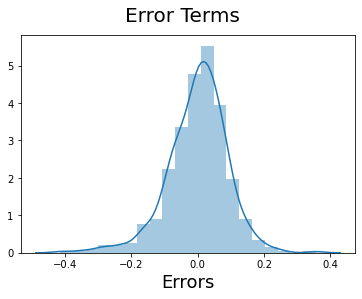

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seems to be normally distributed with mean equals to zero, so the assumption on the linear modelling seems to be fulfilled

In [95]:
X_train_lm.shape

(510, 12)

In [96]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

##### Checking for homoscedasticity

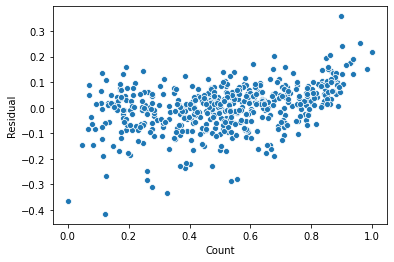

In [97]:
sns.scatterplot(y_train,(y_train - y_train_cnt))
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Here error terms is the same across all values of the independent variables

In [98]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.40e-187
Time:                        13:33:07   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

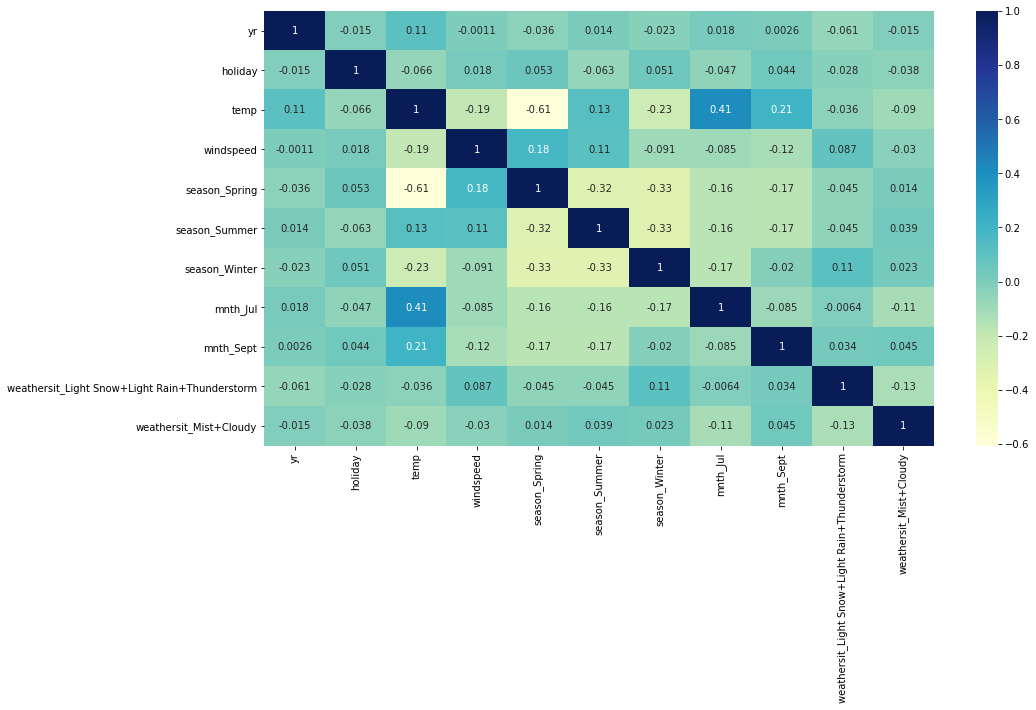

In [99]:
# Validating Multi Colinearity < 0.5
plt.figure(figsize=(15,8))
sns.heatmap(X_train_model5.corr(),annot=True, cmap='YlGnBu')
plt.show()

## Making Predictions
### Aplying scaling on test datasets

In [100]:
scaler_vars = ['temp','hum','windspeed','cnt']

df_test[scaler_vars] = scaler.transform(df_test[scaler_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow+Light Rain+Thunderstorm,weathersit_Mist+Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Dividing df_test to X_test and y_test

In [101]:
y_test = df_test.pop('cnt')
X_test = df_test

In [102]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow+Light Rain+Thunderstorm,weathersit_Mist+Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [103]:
X_train_model5.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weathersit_Light Snow+Light Rain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [104]:
X_test_new = X_test[X_train_model5.columns]

In [105]:
# Adding a constant variable 

X_test_new = sm.add_constant(X_test_new)

In [106]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

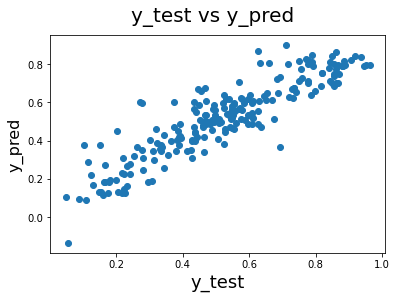

In [107]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

Evaluation of test by comparison of y_pred and y_test

In [108]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8049418440982381

Adjusted R-squared value for TEST

In [109]:
X_test_new.shape

(219, 12)

In [110]:
r2 = r2_score(y_test, y_pred)

# n is number of rows in X

n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7935792330748345

In [111]:
#Returns the mean squared error; we'll take a square root
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

0.0962519856982605


In [112]:

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.40e-187
Time:                        13:33:09   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

P-values for all the variables looks fine now 

Prob (F-statistics) looks fine approx equals to zero

R-squared is 0.836 which is showing ~ 84% variance of the data

Adj R-squared for final model is 0.832 

## Result 

### Train R-Squared = 83.6
### Train Adj. R-Squared = 83.2
### Test R-Squared = 80.49
### Test Adj. R-Squared = 79.35

### Outcomes

##### The equation for best fitted line is

##### cnt = 0.1996 + 0.2335 yr - 0.0980 holiday +  0.4915 temp - 0.1480 windspeed - 0.0669 season_Spring + 0.0453 season_Summer +  0.0831 season_Winter - 0.0524 mnth_Jul + 0.0767 mnth_Sept  - 0.2852 weathersit_Light Snow+Light Rain+Thunderstorm -  0.0816 weathersit_Mist+Cloudy
        




# Conclusion


## There is a sufficient evidence to reject the Null hypothesis in favor of alternate hypothesis. At least one of the beta coefficient is not equal to zero. Thus atleast one independent variable is linearly related to the dependent variable.

## So this linear regression model is valid.

## Yes !! This is a pretty good model

By analyzing the above model we can conclude that

1. The demand for bikes was more in 2019 compared to 2018 but facing dips due to Covid-19 Pandemic.
2. The company should focus on Summer and winter to expand their business.
3. With the temperature, the boombikes booking can go up to 0.4915 units.
4. There is a negative correlation for Mist+Cloudy and Light Snow+Light Rain+Thunderstorm conditions.